<a href="https://colab.research.google.com/github/shashankbhatia15/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [235]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
#read csv file
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/CAPSTONE PROJECTS/CORONAVIRUS TWEET SENTIMENT ANALYSIS - SHASHANK BHATIA/data/Coronavirus Tweets.csv',encoding= 'ISO-8859-1')

# **DATA OVERVIEW**

In [238]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [239]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [240]:
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@narendramodi Sir I am not panic respect &amp;...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [242]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [243]:
df.shape

(41157, 6)

In [244]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

# **DATA INFORMATION**


---
We have 41157 rows and 6 columns in our dataset with null values present only in location, which will not affect our model as we will not be using this feature. Here our target variable will be *Sentiment*, which has 5 unique values- 'Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'. Out of the other 5 features, the only column we really need for our classification project is *OriginalTweet * .


In [245]:
#copying data to preserve orignal file
df1= df.copy()

# **EDA**

In [246]:
#check duplicate entries
len(df1[df1.duplicated()])

0

No duplicates in the data found

**TWEET COUNT FOR EACH SENTIMENT**

In [247]:
#sentiment count
df1.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


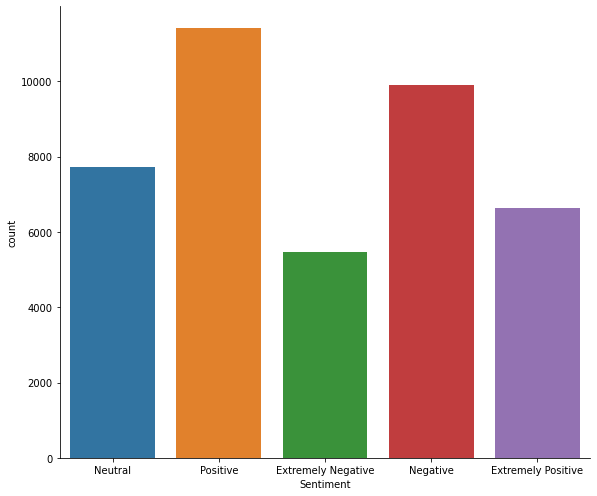

In [248]:
#plotting sentiment count
sns.catplot("Sentiment", data=df1, kind="count",height=7,aspect=1.2)

Most of the tweets are positive, which shows that people have kept their calm during the pandemic.

**TOP 10 LOCATION BASED ON TWEET COUNT**

In [249]:
#sentiment count
count=df1.Location.value_counts().head(10)
df1.Location.value_counts().head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

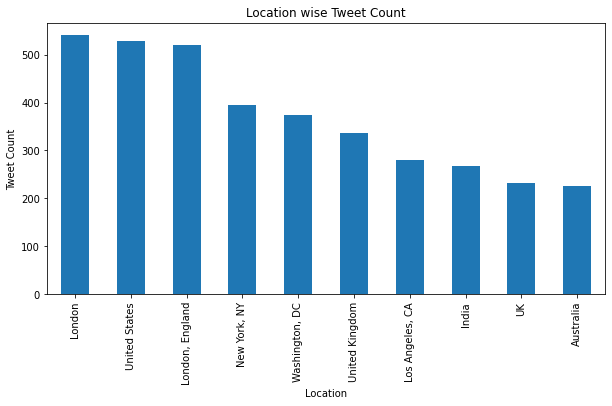

In [250]:
#plotting sentiment count
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
count.plot(ax = ax, kind='bar')
ax.set_title('Location wise Tweet Count')
ax.set_xlabel('Location') 
ax.set_ylabel('Tweet Count')
plt.show()

Max tweets are done from London and US

# **TEXT PREPROCESSING**

**REMOVING LINKS/URLs**

In [251]:
import re
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))

confirming if it worked



In [252]:
#copied data
df1.OriginalTweet[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines  "

In [253]:
#orignal data
df.OriginalTweet[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

**REMOVINMG USERNAMES/@USER**

In [254]:
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: re.sub('@[\w]*',' ', str(x)))

In [255]:
#result
df1.OriginalTweet[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines  "

**REMOVING PUNCTUATIONS/NUMBERS/SPECIAL CHARACTERS**

In [256]:
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [257]:
#result
df1.OriginalTweet[10]

'All month there hasn t been crowding in the supermarkets or restaurants  however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket   manila  lockdown  covid      Philippines  '

**REMOVING STOP WORDS AND TOKENIZING**

In [258]:
#Importing Stop-words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [259]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [260]:
df1['OriginalTweet']= df1['OriginalTweet'].apply(lambda x: remove_stopwords(x))

In [261]:
#result
df1.OriginalTweet[10]

['month',
 'crowding',
 'supermarkets',
 'restaurants',
 'however',
 'reducing',
 'hours',
 'closing',
 'malls',
 'means',
 'everyone',
 'using',
 'entrance',
 'dependent',
 'single',
 'supermarket',
 'manila',
 'lockdown',
 'covid',
 'philippines']

**REMOVING SHORT WORDS**

In [266]:
#Removing words with short length (less than 3 letters)
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: (y for y in x if len(y)>3) )

In [268]:
#result
print(df1.OriginalTweet[10])

<generator object <lambda>.<locals>.<genexpr> at 0x7efbc21ff450>


**STEMMING**

In [269]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [270]:
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [271]:
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: stemming(x))

In [272]:
#result
df1.OriginalTweet[10]

'month crowd supermarket restaur howev reduc hour close mall mean everyon use entranc depend singl supermarket manila lockdown covid philippin'